#◢ ELSED: Enhanced Line SEgment Drawing (🐍 Python demo)

<table class="tfo-notebook-buttons" align="left">
  <td>
  <a target="_blank" href="https://arxiv.org/abs/2108.03144"><img src="https://cpb-us-e1.wpmucdn.com/blogs.cornell.edu/dist/8/7752/files/2021/02/arxiv-logo-1.png" width=60px/>arXiv</a>
    </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/iago-suarez/ELSED/blob/main/Python_ELSED.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/iago-suarez/ELSED/blob/main/Python_ELSED.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>
<br></br>&nbsp;


This file shows how to compile and use [ELSED](https://github.com/iago-suarez/ELSED) for Python.

We have created a ready-to-use python wrapper using [pybind11](https://github.com/pybind/pybind11) that exposes one simple function:

* `pyelsed.detect(image, params...)`: Detects ELSED segments. Default parameters are a good option in general but you can customize them if you want.

You can find all the details of the method in:
> **[Suárez, I., Buenaposada, J. M., & Baumela, L. (2021). ELSED: Enhanced Line SEgment Drawing. arXiv preprint arXiv:2108.03144.](https://arxiv.org/abs/2108.03144)**

In [ ]:
# Install pyelsed, It's pretty easy :)
!pip install git+https://github.com/iago-suarez/ELSED.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/iago-suarez/ELSED.git (to revision pyelsed) to /tmp/pip-req-build-pkm0eavd
  Running command git clone --filter=blob:none --quiet https://github.com/iago-suarez/ELSED.git /tmp/pip-req-build-pkm0eavd
  Running command git checkout -b pyelsed --track origin/pyelsed
  Switched to a new branch 'pyelsed'
  Branch 'pyelsed' set up to track remote branch 'pyelsed' from 'origin'.
  Resolved https://github.com/iago-suarez/ELSED.git to commit 74ff75fda0ecccf4b9b991421da4fdb955775d30
  Running command git submodule update --init --recursive -q
  Preparing metadata (setup.py) ... done
  Created wheel for pyelsed: filename=pyelsed-0.0.0-cp39-cp39-linux_x86_64.whl size=90112 sha256=a5032dc7984ecfd0fa93d72b2a97a8ecac0c41f7be8e919f18455e7ec772abc4
  Stored in directory: /tmp/pip-ephem-wheel-cache-xpa1ziug/wheels/3e/3e/b5/9ad91b23424d3f468cf3179af4c0d0a2914fffbfbe479068f0
Succ

Now the library is available, lets use it to

****************************
#◢ Line Segment detection with ELSED

In [ ]:
import pyelsed

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

import cv2
print('Opencv version: ' + cv2.__version__)
fname = None

Opencv version: 4.6.0


Saving 72960291_1064264003_o.jpg to 72960291_1064264003_o.jpg


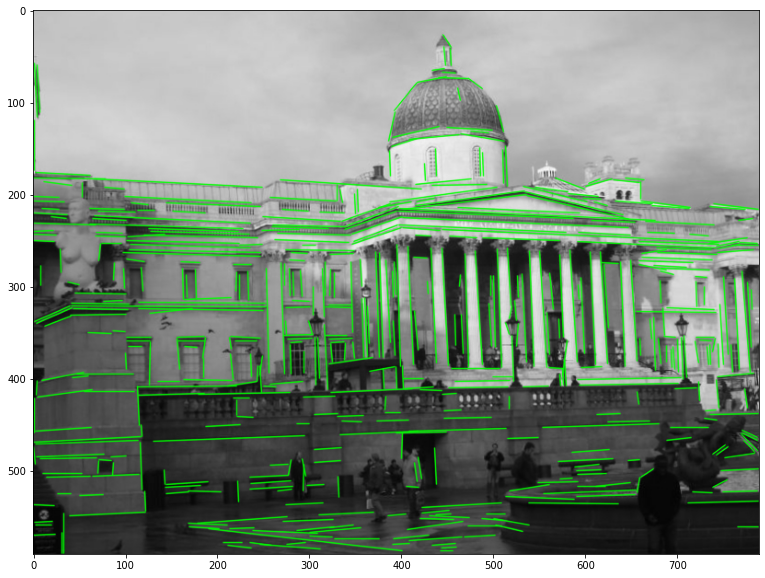

In [ ]:
if fname is None:
  from google.colab import files
  files = files.upload()
  fname = list(files.keys())[0]
else:
  fname = wget.download(fname)

img = cv2.imread(fname, cv2.IMREAD_GRAYSCALE)

segments, scores = pyelsed.detect(img)

dbg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
for s in segments.astype(np.int32):
    cv2.line(dbg, (s[0], s[1]), (s[2], s[3]), (0, 255, 0), 1, cv2.LINE_AA)

plt.imshow(dbg)